<center> <h1>INFO-H500 - Image acquisition and processing - </h1> </center>

<center> <h2>Assignment 2: Coding Project - Picture enhancement</h2> </center>
 
<center> <h3>Guillaume Buisson-Chavot</h3> </center> 
<center> <h3>matricule: 000465822 </h3> </center> 

# 0- Image display

<IPython.core.display.Javascript object>


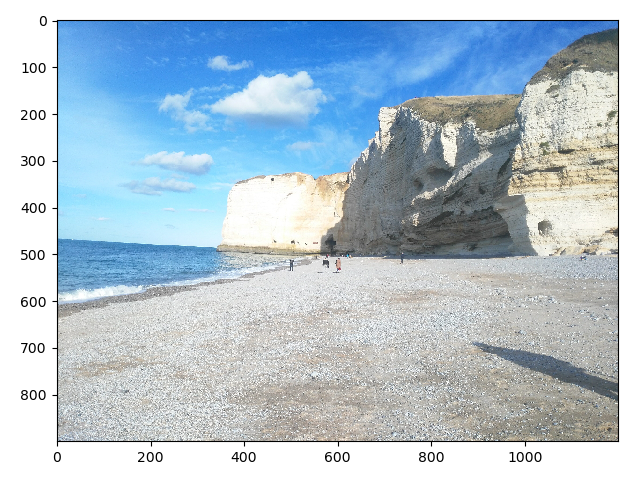

[ 75 152 230]
[ 78 151 230]
[ 83 150 231]
152
[75 78 83 ... 76 60 67]


In [59]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import gray2rgba, rgb2gray, gray2rgb
%matplotlib notebook
from skimage.io import imread, imshow, imsave

im = imread('etretat.jpg')
plt.figure()
imshow(im)
plt.show()
print(im[0,0])
print(im[0,1])
print(im[0,2])
print(im[0,0,1])
t = im[:,:,0]
print(t[0])

# 1- Noise reduction

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


<IPython.core.display.Javascript object>


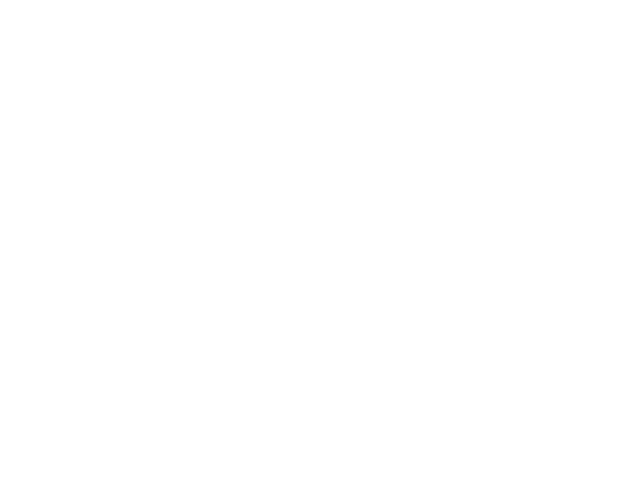

TypeError: only size-1 arrays can be converted to Python scalars

In [37]:
from skimage.morphology import disk
from skimage.filters.rank import mean, median
im5 =disk(2)
print(im5)
plt.figure()
imshow(im5)
plt.show()
im6= np.array([[0, 0, 0, 2, 0, 0, 0],
 [0, 2, 3, 4, 5, 6, 0],
 [0, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 1, 0, 0, 0]])

im7= np.mean(im6,disk(2))
print(im7)

<IPython.core.display.Javascript object>


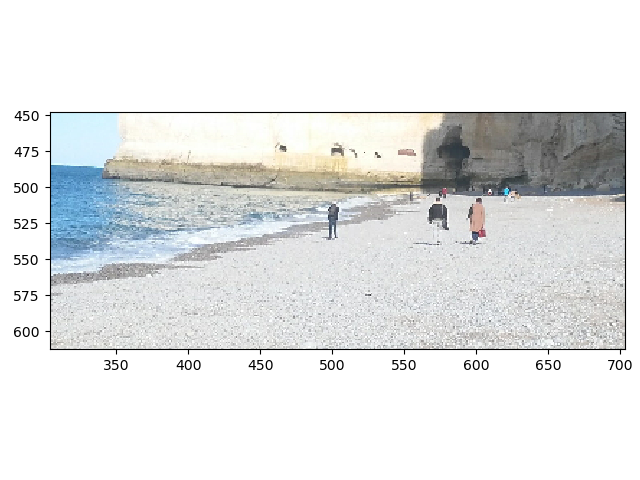

<IPython.core.display.Javascript object>


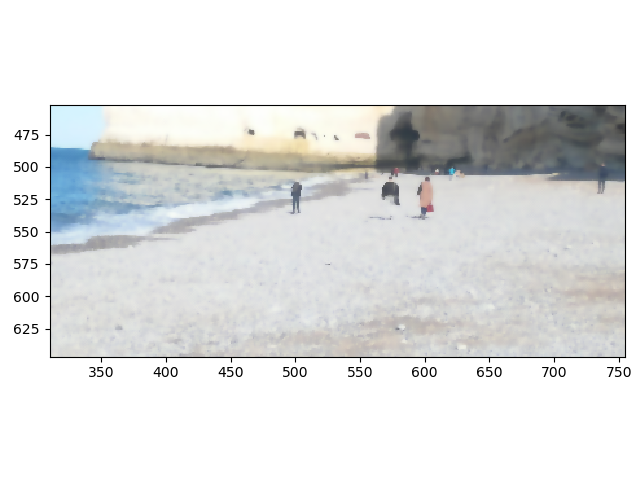

In [44]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
original = img_as_float(im)
plt.figure()
imshow(original)
plt.show()
plt.figure()
imshow(denoise_tv_chambolle(original, weight=0.1, eps=0.0002, n_iter_max=200, multichannel=True))
plt.show()

<IPython.core.display.Javascript object>


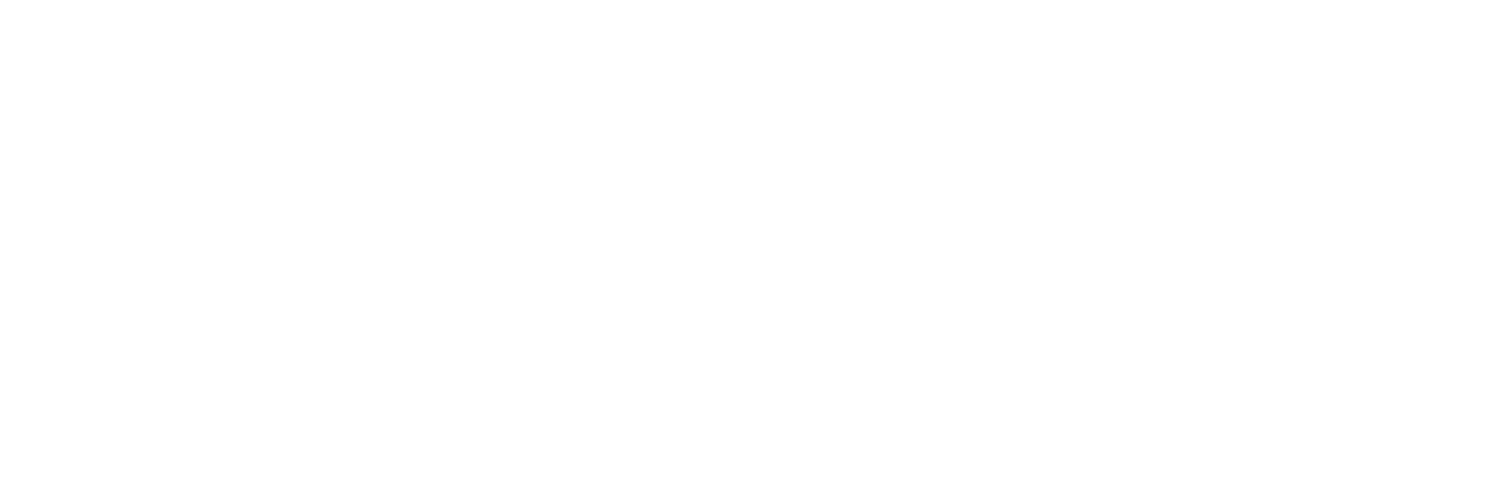

ValueError: setting an array element with a sequence.

In [56]:
from skimage.filters.rank import mean, median
from skimage.morphology import disk
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
imshow(im)
def transform(i,n):
    i2 = np.copy(i)
    for line in i2:
        for pixel in line:
            pixel[0]=mean(i2[:,:,0], disk(n))
            pixel[1]=mean(i2[:,:,1], disk(n))
            pixel[2]=mean(i2[:,:,2], disk(n))
    return i2    
plt.subplot(1,4,2)
imshow(transform(im,3))
plt.subplot(1,4,3)
imshow(transform(im,5))
plt.subplot(1,4,4)
imshow(transform(im,10))
plt.show()


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
color_image = cv2.imread('etretat.jpg')
gray_img = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
sliding_window_size_x = 5
sliding_window_size_y = 5
mean_filter_kernel = np.ones((sliding_window_size_x,sliding_window_size_y),np.float32)/(sliding_window_size_x*sliding_window_size_y)
filtered_image = cv2.filter2D(gray_img,-1,mean_filter_kernel)


plt.subplot(121),plt.imshow(gray_img),plt.title('Original Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(filtered_image),plt.title('Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()



ModuleNotFoundError: No module named 'cv2'

In [18]:
def denoise(img, weight=0.1, eps=1e-3, num_iter_max=200):
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
        # x and y components of u's gradient
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        # update the dual variable
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new
        # calculate divergence
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # update image
        u = img + weight * div_p
        # calculate error
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        if i == 0:
            err_init = error
            err_prev = error
        else:
            # break if error small enough
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # don't forget to update iterator
        i += 1

    return u

<IPython.core.display.Javascript object>


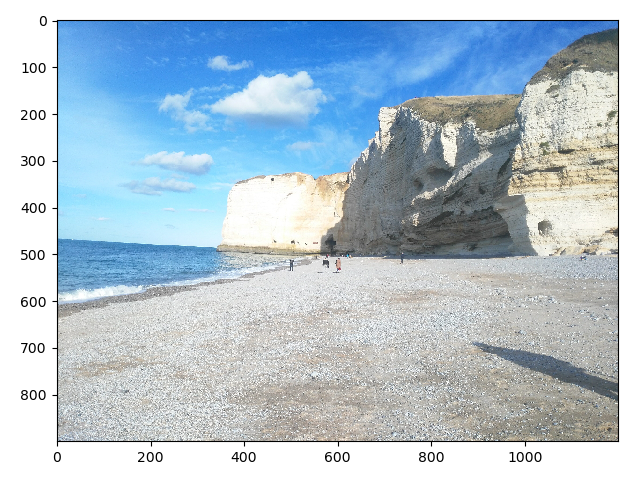

(900, 1200, 3)

In [19]:
plt.figure()
imshow(im)
plt.show()
np.shape(im)

<IPython.core.display.Javascript object>


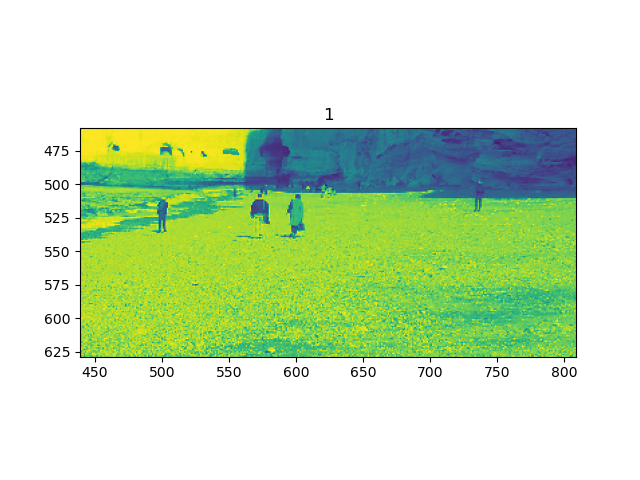

<IPython.core.display.Javascript object>


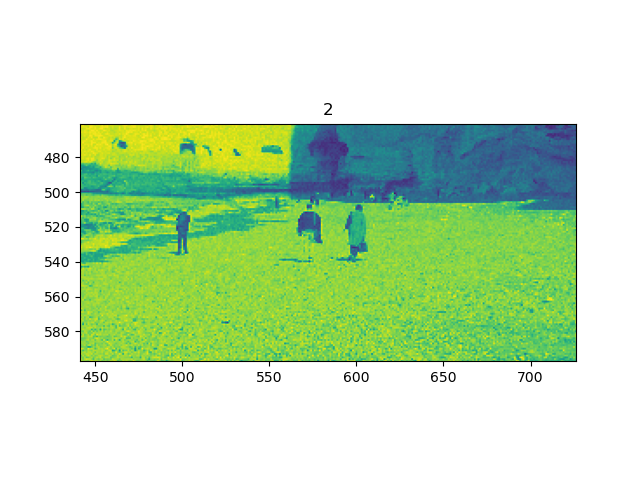

<IPython.core.display.Javascript object>


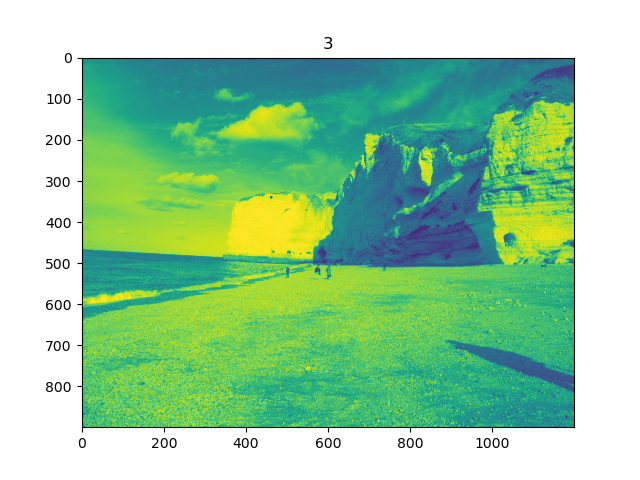

<IPython.core.display.Javascript object>


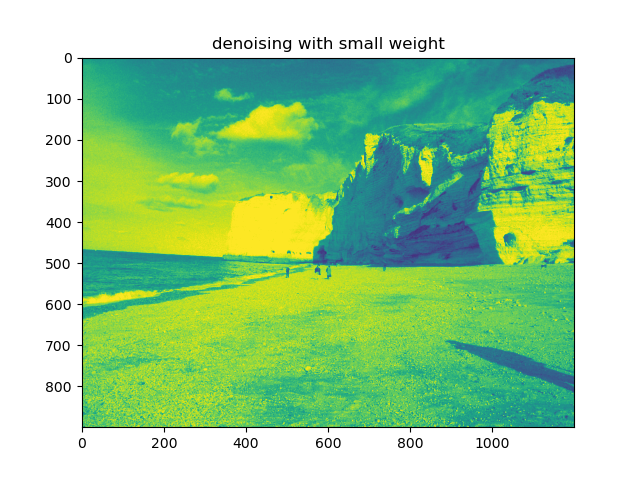

In [20]:
from skimage.io import imread
from skimage.color import rgb2gray
img2 = rgb2gray(im) * 255
plt.figure()
plt.imshow(img2, cmap ='viridis')
plt.title('1')
plt.show()

noisy = img2 + 0.5 * img2.std() * np.random.random(img2.shape)
plt.figure()
plt.imshow(noisy, cmap='viridis')
plt.title('2')
plt.show()

noisy = np.clip(noisy, 0, 255)
plt.figure()
plt.imshow(img2, cmap='viridis')
plt.title('3')
plt.show()

im2 = denoise(noisy)
plt.figure()
plt.imshow(im2, cmap='viridis')
plt.title('denoising with small weight')
plt.show()


<IPython.core.display.Javascript object>


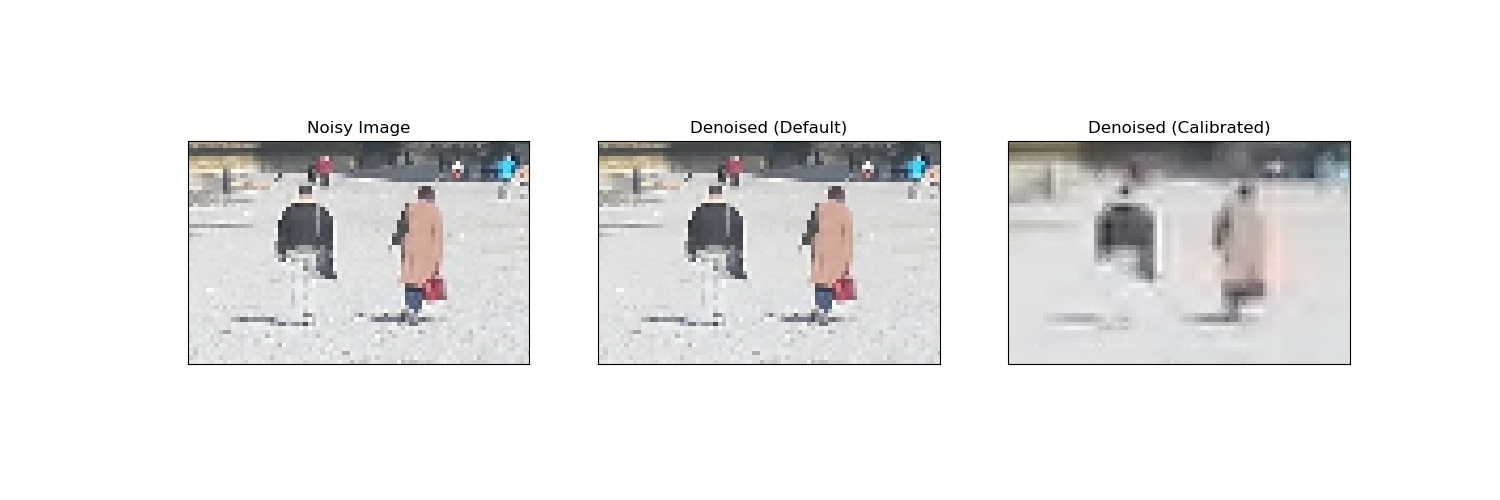

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
%matplotlib notebook
from skimage.data import chelsea, hubble_deep_field
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.restoration import (calibrate_denoiser,
                                 denoise_wavelet,
                                 denoise_tv_chambolle, denoise_nl_means,
                                 estimate_sigma)
from skimage.util import img_as_float, random_noise
from skimage.color import rgb2gray
from functools import partial

_denoise_wavelet = partial(denoise_wavelet, rescale_sigma=True)

image = img_as_float(chelsea())
sigma = 0.2
noisy = im #random_noise(image, var=sigma ** 2)

# Parameters to test when calibrating the denoising algorithm
parameter_ranges = {'sigma': np.arange(0.1, 0.3, 0.02),
                    'wavelet': ['db1', 'db2'],
                    'convert2ycbcr': [True, False],
                    'multichannel': [True]}

# Denoised image using default parameters of `denoise_wavelet`
default_output = denoise_wavelet(noisy, multichannel=True, rescale_sigma=True)

# Calibrate denoiser
calibrated_denoiser = calibrate_denoiser(noisy,
                                         _denoise_wavelet,
                                         denoise_parameters=parameter_ranges
                                         )

# Denoised image using calibrated denoiser
calibrated_output = calibrated_denoiser(noisy)

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))

for ax, img, title in zip(axes,
                          [noisy, default_output, calibrated_output],
                          ['Noisy Image', 'Denoised (Default)',
                           'Denoised (Calibrated)']):
    ax.imshow(img)
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

# 2- Auto-level

# 3- Gamma correction (with gamma provided by the user or automatically determined from the image histogram)

# 4- Increase colour saturation

netteté, luminosité, densité, contraste